# Исследование объявлений о продаже квартир
**Цель исследования**: выявить параметры, котрые влияют на ценообразование квартир. 

**Общая идея исследования:** необходимо установить закономерности изменения цен квартир в зависимости от различных данных в таблице (а именно, параметры квартир). Потребуется сопоставить реальные данные квартир, определяемые картографическими характеристиками и данные, предоставленные владельцами/продавцами квартир.

**Общий план исследования**:
1. Провести анализ влияния картографических данных квартир на их цену.
2. Провести анализ влияния характеристик квартир, даных владельцами/продавцами на цену квартир.
3. Свести значимость каждого параметра в таблицу, соответственно большей его значимости для ценообразования.

## Импорт библиотек

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Изучение данных из файла

* Для начала импортируем сами данные из таблицы

In [2]:
# на всякий случай исключим сбой при прочтении поврежденных данных
try:
    data = pd.read_csv('/datasets/real_estate_data.csv')
except:
    print('Ошибка прочтения данных')

* Выведем детальную информацию о таблице с данными

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


В таблице предствлено 23699 строк и 22 столбца. Данные представлены в виде чисел (int64), вещественных чисел (float64), объектов (строк) - object, булевых значений (bool). 
Сразу можно отметить неравномерно заполненные столбцы, наличие в них пропусков.

**Из общего описания таблицы видно, что в ней содержатся следующие строки:**

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

In [4]:
# рассмотрим в деталях названия столбцы
data.columns

Index(['total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition'], dtype='object')

В названиях столбцов исльзован разделитель \t, заменим его, заново прочитав с доп. условием.

In [5]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Обнаружены названия столбцов с "верблюжьим синтаксисом" (cityCenters_nearest), а также слова без разделителя (ponds_around3000). Исправим и выведем вновь на экран.

In [6]:
# переименуем столбцы на корректные
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000':'parks_around_3000', 
                     'ponds_around3000': 'ponds_around_3000'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
# просмотрим, как выглядит таблица
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

В таблице предствлено 23699 строк и 22 столбца. Данные представлены в виде чисел (int64), вещественных чисел (float64), объектов (строк) - object, булевых значений (bool). 
Можно отметить неравномерно заполненные столбцы, наличие в них пропусков. В названиях столбцов используется разделитель \t. Обнаружены названия столбцов с "верблюжьим синтаксисом" (cityCenters_nearest), а также слова без разделителя (ponds_around3000). 

## Предобработка данных

Проверим уникальные значения таблицы по столбцам

In [8]:
columns_unique = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition']
for column in columns_unique:
    print(column, data[column].unique())
    print()

total_images [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]

last_price [13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]

total_area [108.    40.4   56.   ...  66.86 133.81  76.75]

first_day_exposition ['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']

rooms [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]

ceiling_height [  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
  

Проверим пропущенные данные в таблице

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Итак, обнаружены пропуски. Рассмотрим их по порядку значимости для нашего исследования
- city_centers_nearest - расстояние до центра города - 5519 пропусков: существенно важная характеристика для ценообразования, замену пропусков осуществим по совпадению населенного пункта.
- airports_nearest - расстояние до ближайшего аэропорта - 5542 пропуска: значимая характеристика, возможно определение расстояния по совпадению названия населенного пункта других квартир.
- locality_name - название населённого пункта - 49 пропусков: важный параметр. Есть предположение, что возможно определить населенный пункт по совпадению расстояния от центра и близкости к парковым зонам и аэропорту.
- living_area - жилая площадь в квадратных метрах - 1903 пропуска: характеристика, которая не всегда указывается продавцами и зачастую схожа с общей площадью квартиры (total_area). Пропустим на данном этапе.
- kitchen_area - площадь кухни в квадратных метрах - 2278 пропусков: важный параметр. Кухни в среднем схожи по площади, потому пропущенные значения можно заменить на средние у схожих по общей площади квартир.
- floors_total - всего этажей в доме - 86 пропусков: вероятно, ошибка не системная и пропуски совершены случайно некоторыми продавцами, либо это вовсе одноэтажный дом. Пропуски можно отбросить в силу сложности восстановления этажности домов, а также в силу немногочисленности пропусков.
- ceiling_height - высота потолков - 9195 пропусков: вероятно, пропуски совершенны владельцами квартир, которые решили не указывать саму высоту как не самую важную компоненту характеристики квартиры. Их много, но ими можно пренебречь на данном этапе и вовсе пока проигнорировать. Оставить без изменений
- is_apartment - апартаменты - 20924 пропуска: многочисленные пропуски, однако это информация соответствует редкой категории недвижимости, является специфической формой квартир. Заменим их на значение "0" подразумевая, что большинство квартиры не являются апартаментами.
- balcony - число балконов - 11519 пропусков: не всегда указываемый параметр в объявлениях о продаже квартир; помимо этого, редко бывает более одного балкона в квартирах. Веротяно, возможно заменить пропущенные значения нулем (согласно подсказке из задания).
- parks_around_3000 - число парков в радиусе 3 км - 5518 пропуск: замена по принципу совпадения населенного пункта.
- parks_nearest - расстояние до ближайшего парка - 15620 пропусков: не самая существенная характеристика, которой пока пренебрежем - оставим как есть.
- ponds_around_3000 - число водоёмов в радиусе 3 км - 5518 пропусков: число пропусков совпадает с характеристикой parks_around_3000, вероятно,   встречаются квартиры с меньшей доступностью к паркам и прудам. Возможно это центр города, что можно проверить по расстоянию к центру города, либо это окраина малонаселенная. Проверка по отдаленности к центру городу и по удаленности от аэропорта. Факультативная характеристика.
- ponds_nearest - расстояние до ближайшего водоёма - 14589 пропусков: не все продавцы указывают это расстояние - не каждый знает ее. По сути, это не значимая характеристика.
- days_exposition - сколько дней было размещено объявление (от публикации до снятия) - 3181 пропуск: оставим этот парамерт без изменений, в дальнейшем посомтрим, есть ли связь этого параметра с мошенническими объявлениями.

In [10]:
# для начала проверим наличие явных дубликатов
data.duplicated().sum()

0

In [11]:
# проверим предположение, что отсутствие площади кухни соотносится с количеством квартир-студий
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Видно, что квартир-студий значительно меньше квартир, у которых пропущена площадь кухни.

Приведем таблицу в порядок еще немного, поправим отображение времени размещения объявления

In [12]:
# приведем время в объявлениях в удобочитаюемую форму
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

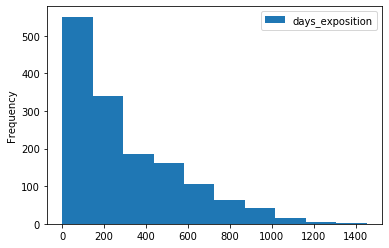

In [14]:
data.pivot_table(index='first_day_exposition', values='days_exposition').plot(kind='hist', bins=10)

Приступим к замене пропущенных значений в полях жилой площади на основе средних значений схожих по общей площади с другими квартирами

In [15]:
# будем ориентироваться на средние значения жилой площади в соответствии с количеству комнат
data['living_area'] = data['living_area'].fillna(
    data.groupby('rooms')['living_area'].transform('mean')) 
#проверим результат пропусков
print('Количество пропусков в столбце жилая площадь после обработки:', data['living_area'].isna().sum())
# проверим корреляцию жилой площади и общей площади
data['living_area'].corr(data['rooms'])

Количество пропусков в столбце жилая площадь после обработки: 0


0.8541076985197138

In [16]:
# проверим корреляцию площади кухни и общей площади
data['kitchen_area'].corr(data['total_area'])
# и будем ориентироваться на средние значения площади кухни в соответствии с общей площадью
data['kitchen_area'] = data['kitchen_area'].fillna(
    data.groupby('total_area')['kitchen_area'].transform('mean')) 
# #проверим результат пропусков
print('Количество пропусков в столбце площадь кухни после обработки:', data['kitchen_area'].isna().sum())

Количество пропусков в столбце площадь кухни после обработки: 205


In [17]:
# посмотрим среднее значение высоты потолков
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [18]:
# и условимся, что высота потолков является в большинстве случаев средней среди большинства
data['ceiling_height'] = round(data['ceiling_height'].fillna(data['ceiling_height'].median()), 2)

In [19]:
# Определить значение понятия "расстояние до центра" для каждого региона затруднительно, 
# так как это относительная величина и неизвестно, какой центр подразумевается в пропущенных
#значениях. Bозможно, она не столь важна для отдаленных от столицы регионов, потому и не указана. 
# Можно проверить, какие это регионы 
display(data[data['city_centers_nearest'].isna()]['locality_name'].unique())

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Как видно, пропуски значений есть везде

In [20]:
# проделаем то же для выяснения регионов с пропущенными значениями расстояния до аэропортов
display(data[data['airports_nearest'].isna()]['locality_name'].unique())

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Ситуация с расстоянием до аэропотров аналогична - пропуски есть везде

После заполнения пропусков посмотрим, как выглядит ситауция теперь

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              205
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пока оставим так, как есть, возможно, нам будет достаточно этой обработки

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23494 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

Приведем данные некоторых столбцов в один тип, с которыми будет удобно работать в дальнейшем.

In [23]:
# создадим список столбцов для перевеода целочисленный тип данных для дальнейших операций ,
# в частности, для категоризации данных
series_to_int = ['total_area', 'last_price', 'living_area', 'floor']
for column in series_to_int:
    data[series_to_int] = data[series_to_int].astype('int')

## Расчёты и добавление результатов в таблицу

In [24]:
# рассичтаем стоимость квадратного метра для каждого региона
data['metter_price'] = (data['last_price'] / data['total_area']).astype('int')

In [25]:
# соотношение жилой площади к общей
data['living_total_area'] = round(data['living_area'] / data['total_area'], 2)

In [26]:
# соотношешние площади кухни к общей площади
data['kitchen_total_area'] = round(data['kitchen_area'] / data['total_area'], 2)

In [27]:
# добавим категорию этажности квартир в новый столбец
def floor_category(floor):
    if floor == 1:
        return 'первый'
    else:
        return 'другой'
data['floor_category'] = data['floor'].apply(floor_category)
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [28]:
# добавим день недели, месяц и год в таблицу
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

## Исследовательский анализ данных

1. Исследование площади, цены, числа комнат, высоты потолков. Гистограммы для каждого, с одновременным отсеиванием выбросов по квантилям

AxesSubplot(0.125,0.125;0.775x0.755)
count    19910.000000
mean        58.147966
std         33.415725
min         12.000000
25%         39.000000
50%         50.000000
75%         67.000000
max        900.000000
Name: total_area, dtype: float64


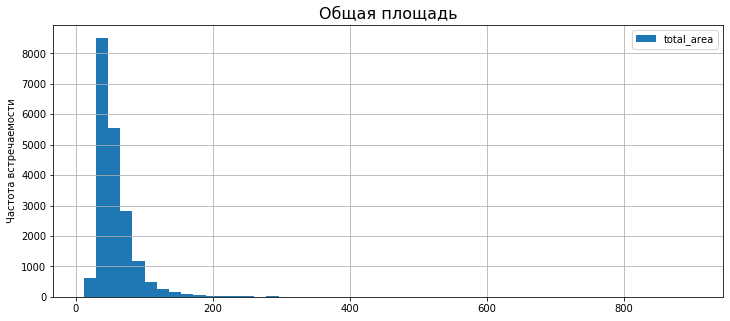

AxesSubplot(0.125,0.125;0.775x0.755)
count    1.991000e+04
mean     6.175795e+06
std      1.070848e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.450000e+06
max      7.630000e+08
Name: last_price, dtype: float64


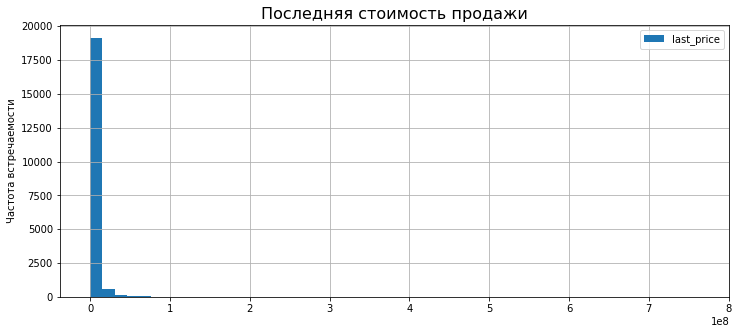

AxesSubplot(0.125,0.125;0.775x0.755)
count    19910.000000
mean         2.012557
std          1.041768
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


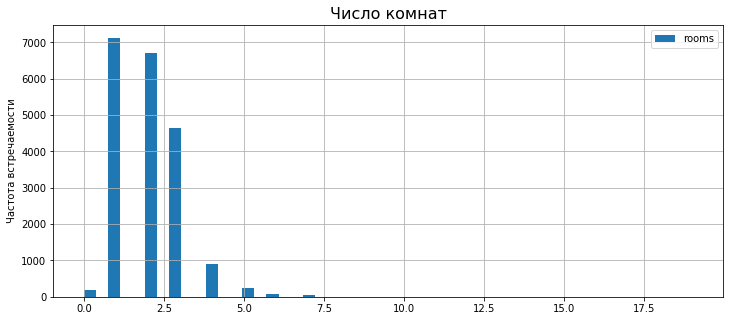

AxesSubplot(0.125,0.125;0.775x0.755)
count    19910.000000
mean         2.714103
std          0.983442
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


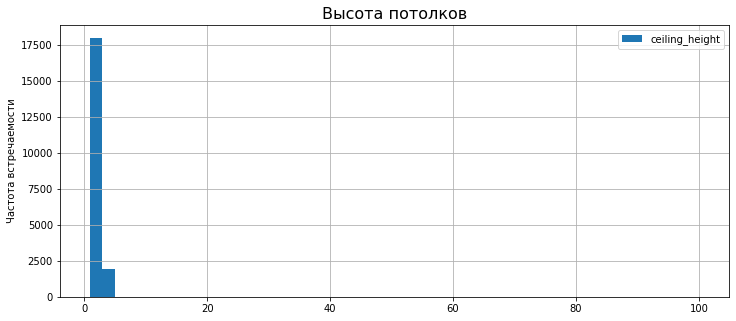

AxesSubplot(0.125,0.125;0.775x0.755)
count    19910.000000
mean       155.398192
std        164.084456
min          1.000000
25%         44.000000
50%         91.000000
75%        211.000000
max        792.000000
Name: days_exposition, dtype: float64


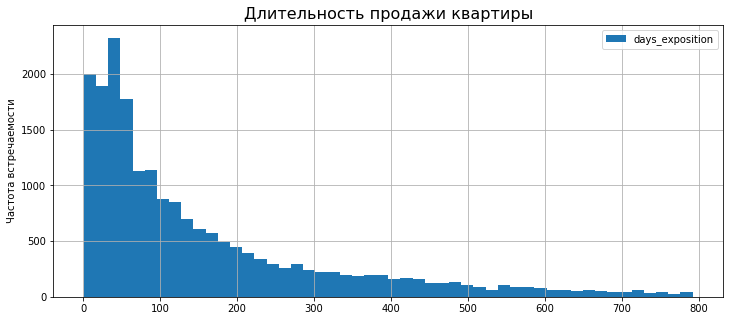

In [29]:
# создадим гистограммы для выяснения распределения необходимых нам параметров 
# (площади, цены, числа комнат, высоты потолков)
# создадим список, по которому будет пробегать наш цикл
col_to_quantille = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
# создадим цикл, который отсеит все выбросы интересующих нас столбцов в основной таблице
# а также создадим отфильтрованную таблицу, с которой в дальнейшем будем работать
for column in col_to_quantille:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1 # межквантильный размах
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    filtered_data = data.loc[(data[column] > fence_low) & (data[column] < fence_high)]
# создадим список названий для подписи наших гистограмм
x_name = ['Общая площадь', 'Последняя стоимость продажи', 'Число комнат', 'Высота потолков', 'Длительность продажи квартиры']
# создадим следующий цикл для вывода гистограмм получившейся отфильтрованной таблицы
for i in range(len(x_name)):
    print(filtered_data.plot(y=col_to_quantille[i], title=x_name[i], kind='hist', bins=50,
                             figsize=(12, 5), grid=True))
    print(filtered_data[col_to_quantille[i]].describe())
    plt.ylabel('Частота встречаемости')
    plt.title(x_name[i], fontsize=16)
    plt.show()    
    



count    19910.000000
mean       155.398192
std        164.084456
min          1.000000
25%         44.000000
50%         91.000000
75%        211.000000
max        792.000000
Name: days_exposition, dtype: float64


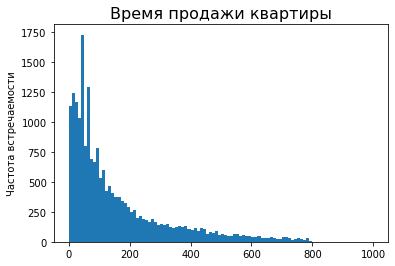

In [30]:
# отсеим значения пиков во времени продажи квартиры (совет наставника)
filtered_data['days_exposition'].drop((filtered_data.loc[(filtered_data['days_exposition'] == 0)].index))
# проверим значение средних и квартилей после исключения нулевых значений
print(filtered_data['days_exposition'].describe())
filtered_data['days_exposition'].plot(kind='hist', bins=100, range=(0, 1000))
plt.ylabel('Частота встречаемости')
plt.title('Время продажи квартиры', fontsize=16)
plt.show()

**Вывод:** в отфильтрованных данных достаточно немного выбросов, что подтверждается соотношением медиан и средних значений выборки. Можно отметить следующее (далее представлены медианные значения):
- чаще представлены предложения по площади квартиры 53 кв.м. 
- чаще представлены цены на квартиры в районе 4.8 млн руб. 
- чаще представлены двухкомнатные квартиры
- чаще представлены квартиры с высотой потолка, равной 2,65 метров
- в гистограмме длительности продажи квартиры по прежнему имеются выбросы (сильное различие среднего и медианы) Тем не менее, можно отметить самую быструю продажу в один день, и самую долгую за 792 дня. Среднее же значение времени продажи 155 дней, медианное - 91.

4. Изученеи зависимости факторов, влияющих на стоимость квартиры: 
- площадь
- число комнат
- удаленность от центра
- этажность
- дата размещения

Корреляция: 0.7066069380703833


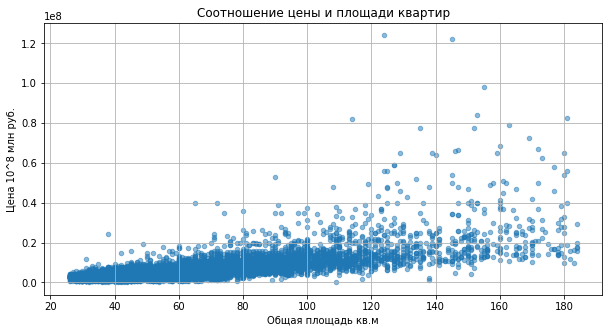

In [31]:
# опишем соотношение цены и площади квартир по отброшенным выбросам
q_low = filtered_data['total_area'].quantile(0.01)
q_hi = filtered_data['total_area'].quantile(0.99)
filtered_data = filtered_data[(filtered_data['total_area'] < q_hi) & (filtered_data['total_area'] > q_low)]
filtered_data.plot(x='total_area', y='last_price', kind='scatter', grid=True, 
                   title='Соотношение цены и площади квартир', figsize=(10, 5),
                  alpha=0.5)
plt.ylabel('Цена 10^8 млн руб.')
plt.xlabel('Общая площадь кв.м')
print('Корреляция:', filtered_data['total_area'].corr(filtered_data['last_price']))

**Выводы:** выявлена связь стоимости с общей площадью квартиры, что подтверждается не только корреляцией но и распределением в графике

Корреляция: -0.30490829339468156


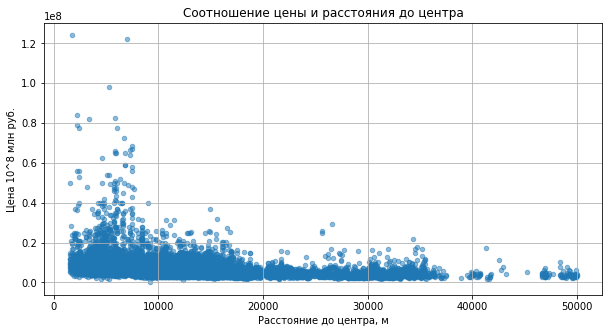

In [32]:
# соотношение расстояния от центра и цены
q_low = filtered_data['city_centers_nearest'].quantile(0.01)
q_hi = filtered_data['city_centers_nearest'].quantile(0.99)
filtered_data = filtered_data[(filtered_data['city_centers_nearest'] < q_hi) & (filtered_data['city_centers_nearest'] > q_low)]
filtered_data.plot(x='city_centers_nearest', y='last_price', kind='scatter', grid=True, 
                   title='Соотношение цены и расстояния до центра', figsize=(10, 5),
                  alpha=0.5)
plt.ylabel('Цена 10^8 млн руб.')
plt.xlabel('Расстояние до центра, м')
print('Корреляция:', filtered_data['city_centers_nearest'].corr(filtered_data['last_price']))

**Выводы:** отмечается более высокая цена на квартиры в радиусе 10 км от центра

Корреляция: -0.006658247240425611


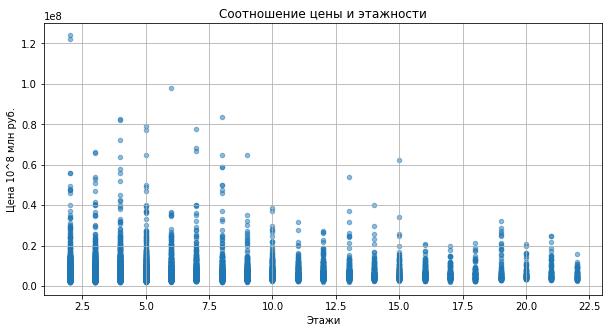

In [33]:
# соотношение этажности и цены
q_low = filtered_data['floor'].quantile(0.01)
q_hi = filtered_data['floor'].quantile(0.99)
filtered_data = filtered_data[(filtered_data['floor'] < q_hi) & (filtered_data['floor'] > q_low)]
filtered_data.plot(x='floor', y='last_price', kind='scatter', grid=True, 
                   title='Соотношение цены и этажности', figsize=(10, 5),
                  alpha=0.5)
plt.ylabel('Цена 10^8 млн руб.')
plt.xlabel('Этажи')
print('Корреляция:', filtered_data['floor'].corr(filtered_data['last_price']))

**Выводы:** можно отметить, что стоимость квартиры также определяется выбором этажа - более дорогие квартиры находятся до 10 этажа. Возможно это связано с тем, что многоэтажных домов не так много

-0.06036441717309601

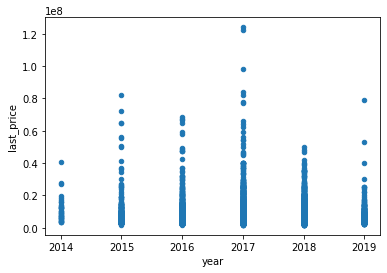

In [34]:
#соотношение года продажи и цены
filtered_data.plot(kind='scatter', x='year', y='last_price')
filtered_data['year'].corr(filtered_data['last_price'])

-0.0012379892196286858

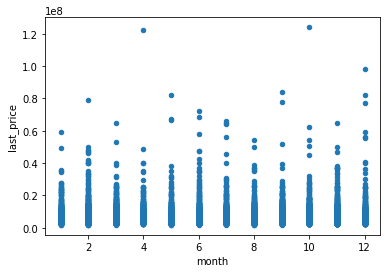

In [35]:
#соотношение года продажи и цены
filtered_data.plot(kind='scatter', x='month', y='last_price')
filtered_data['month'].corr(filtered_data['last_price'])

0.001895889851287262

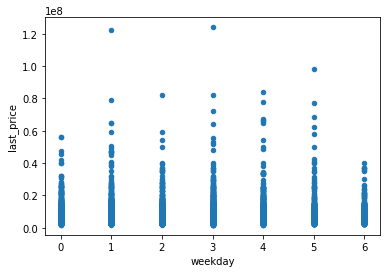

In [36]:
#соотношение года продажи и цены
filtered_data.plot(kind='scatter', x='weekday', y='last_price')
filtered_data['weekday'].corr(filtered_data['last_price'])

**Вывод:** четкой зависимости между временем продаж квартиры и ее ценой не выявлено. Однако можно отметить увеличение стоимости квартир в 2017 году. Возможно это влияние кризиса в стране

5. Топ-10 населенных пунктов с наибольшем количеством объявлений:
- средняя цена квадратного метра в этих регионах
    - самая высокая стоимость
    - самая низкая стоимость

In [37]:
# Топ-10 населенных пунктов с наибольшем количеством объявлений:
top10 = filtered_data['locality_name'].value_counts().head(10)
print(top10)
top_list = ['Санкт-Петербург', 'посёлок Шушары', 'Колпино','посёлок Парголово',
            'Пушкин', 'Сестрорецк', 'Петергоф', 'Красное Село','поселок Металлострой', 'Кронштадт']

# top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values

Санкт-Петербург         11337
посёлок Шушары            330
Колпино                   250
посёлок Парголово         248
Пушкин                    226
Сестрорецк                135
Петергоф                  134
Красное Село              128
посёлок Металлострой       54
Кронштадт                  42
Name: locality_name, dtype: int64


,metter_price
locality_name,
Санкт-Петербург,111880.965158
Сестрорецк,105706.274074
Пушкин,103675.292035
посёлок Парголово,90282.625000
Петергоф,84725.246269
Кронштадт,80762.952381
посёлок Шушары,78288.390909
Колпино,75486.764000
Красное Село,72890.359375


Text(0.5, 1.0, 'Соотношение стоимости квадратного метра и региона продажи')

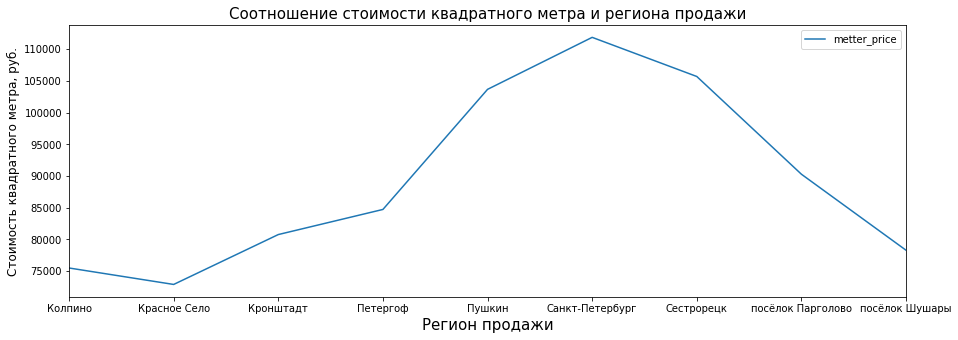

In [38]:
# создадим сводную таблицу, в которой отразим ТОП-10 средней цены за квадратный метр 
top10_table = filtered_data.query('locality_name in @top_list').pivot_table(index='locality_name', values='metter_price',
                               aggfunc=('mean'))
display(top10_table.sort_values(by='metter_price', ascending=False))
top10_table.plot(figsize=(15, 5))
plt.ylabel('Стоимость квадратного метра, руб.', fontsize=12)
plt.xlabel('Регион продажи', fontsize=15)
plt.title('Соотношение стоимости квадратного метра и региона продажи', fontsize=15)

**Вывод:** самая большая средняя цена в городе СПб, самая низкая цена - в Красном Селе

5. Предложения квартир:
- квартиры в СПб - какая область входит в центр?
    - создать столбец с расстоянием до центра в километрах
    - узнать среднюю цену для каждого км
    - график, показывающий границы удаленности от центра

In [39]:
# добавим столбец с расстоянием до центар в километрах
pd.set_option('chained_assignment', None)
filtered_data['to_center_km'] = data['city_centers_nearest'].apply(lambda x: x / 1000)


Text(0.5, 1.0, 'Соотношение стоимости квадратного метра от расстояния до центра')

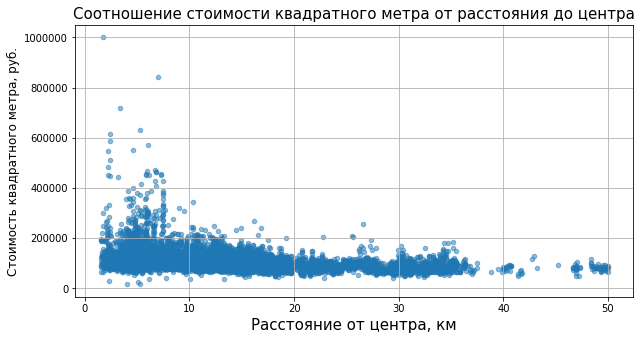

In [40]:
# определим границу центрального района
filtered_data.plot(x='to_center_km', y='metter_price', kind='scatter', grid=True, 
                   title='Соотношение цены кв. м и расстояния до центра', figsize=(10, 5),
                  alpha=0.5)
plt.ylabel('Стоимость квадратного метра, руб.', fontsize=12)
plt.xlabel('Расстояние от центра, км', fontsize=15)
plt.title('Соотношение стоимости квадратного метра от расстояния до центра', fontsize=15)

Text(0.5, 1.0, 'Соотношение стоимости квадратного метра от расстояния до центра')

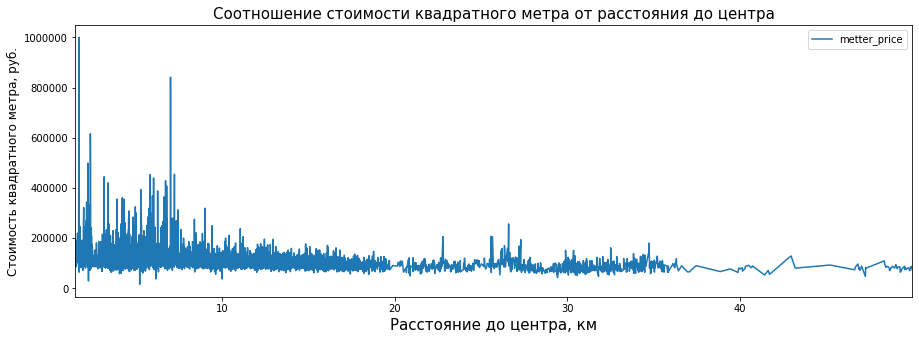

In [41]:
# определим с помощью графика радиус центра
center = filtered_data.pivot_table(index='to_center_km', values='metter_price')
center.plot(figsize=(15, 5))
plt.ylabel('Стоимость квадратного метра, руб.', fontsize=12)
plt.xlabel('Расстояние до центра, км', fontsize=15)
plt.title('Соотношение стоимости квадратного метра от расстояния до центра', fontsize=15)


Видно, что далее расстояния около 8 км можно наблюдать резкий спад стоимости квартир. Таким образом, центр определим радиусом 10 км

6. Анализ квартир в центре:
    - площадь
    - цена
    - число комнат
    - высота потолков
- выделить факторы, влияющие на стоимость:
    - число комнат
    - этаж
    - удаленность от центра
    - дата размещения
- сравнение этих выводов с общими по всему городу

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


'Таблица корреляции параметров для центра'

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.663904,0.788874,0.096872
last_price,0.663904,1.000000,0.374153,0.063895
rooms,0.788874,0.374153,1.000000,0.071850
ceiling_height,0.096872,0.063895,0.071850,1.000000


'Таблица корреляции параметров за пределами центра'

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.816301,0.782925,0.061347
last_price,0.816301,1.000000,0.510864,0.074500
rooms,0.782925,0.510864,1.000000,0.009377
ceiling_height,0.061347,0.074500,0.009377,1.000000


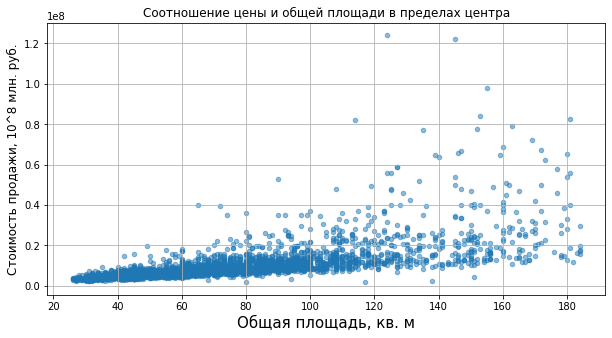

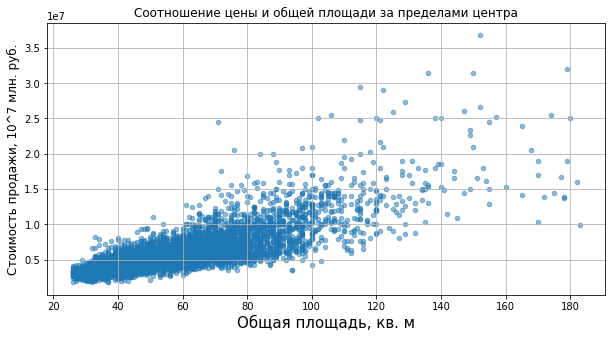

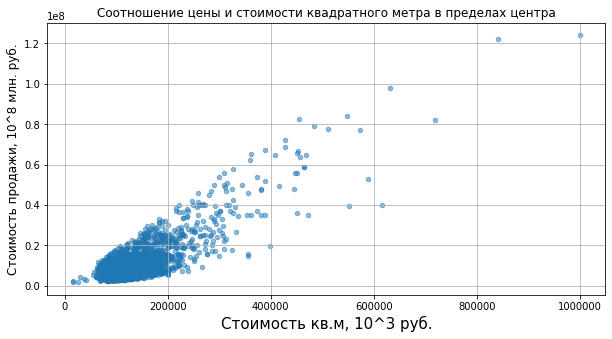

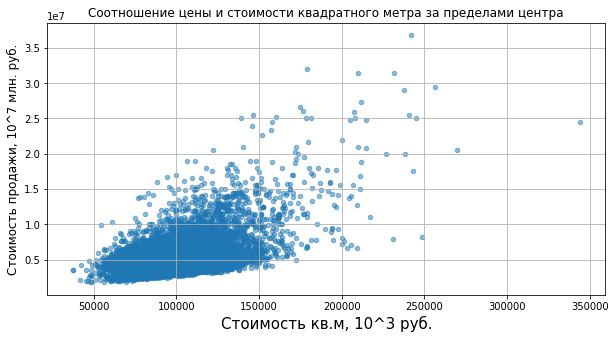

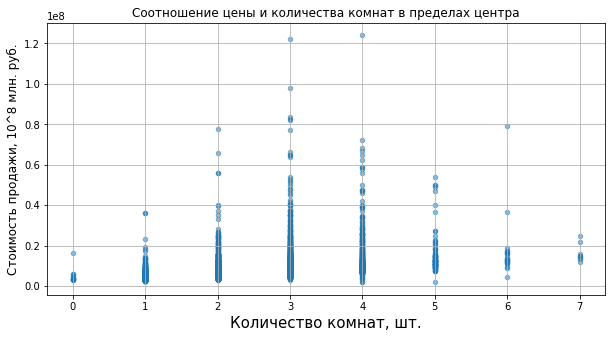

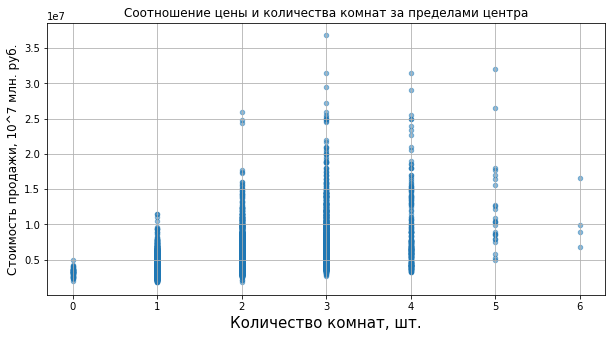

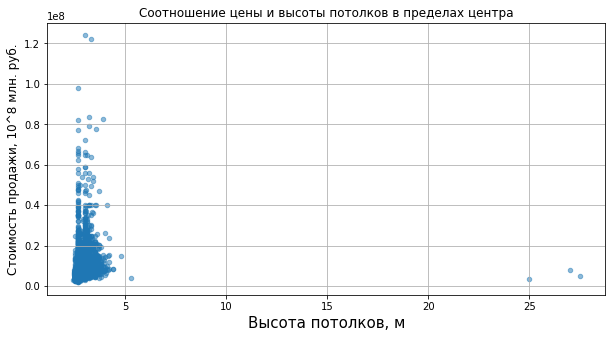

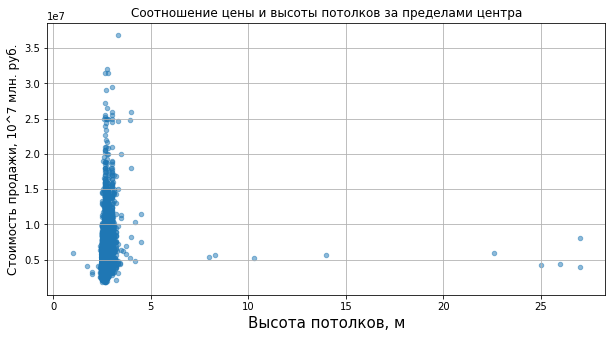

In [43]:
# Построим различные графики для сравнения соотношения общей площади, стоимости квадратного метра, количетсва комнат
# высоты потолков для квартир, в пределах центра и за ним
col_to_compare = ['total_area', 'metter_price', 'rooms', 'ceiling_height']
col_to_compare1 = ['total_area', 'last_price', 'rooms', 'ceiling_height']

x_name2 = ['общей площади', 'стоимости квадратного метра', 'количества комнат', 'высоты потолков']
x_name3 = ['Общая площадь, кв. м', 'Стоимость кв.м, 10^3 руб.', 'Количество комнат, шт.', 'Высота потолков, м']
for i in range(len(col_to_compare)):
    print(filtered_data.query('to_center_km <= 10').
          plot(x=col_to_compare[i], y='last_price', kind='scatter', grid=True, figsize=(10, 5), alpha=0.5))
    plt.ylabel('Стоимость продажи, 10^8 млн. руб.', fontsize=12)
    plt.xlabel(x_name3[i], fontsize=15)
    plt.title('Соотношение цены и '+x_name2[i] +' в пределах центра', fontsize=12)
    print(filtered_data.query('to_center_km > 10').
          plot(x=col_to_compare[i], y='last_price', kind='scatter', grid=True, figsize=(10, 5), alpha=0.5))
    plt.ylabel('Стоимость продажи, 10^7 млн. руб.', fontsize=12)
    plt.xlabel(x_name3[i], fontsize=15)
    plt.title('Соотношение цены и '+x_name2[i] +' за пределами центра', fontsize=12)

display('Таблица корреляции параметров для центра', 
        filtered_data.query('to_center_km <= 10')[col_to_compare1].corr())
display('Таблица корреляции параметров за пределами центра',
        filtered_data.query('to_center_km > 10')[col_to_compare1].corr())

Соотношение параметров цены от общей площади, количестве комнат, высоты потолков в пределах центра

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8e85431d0>,
      dtype=object)

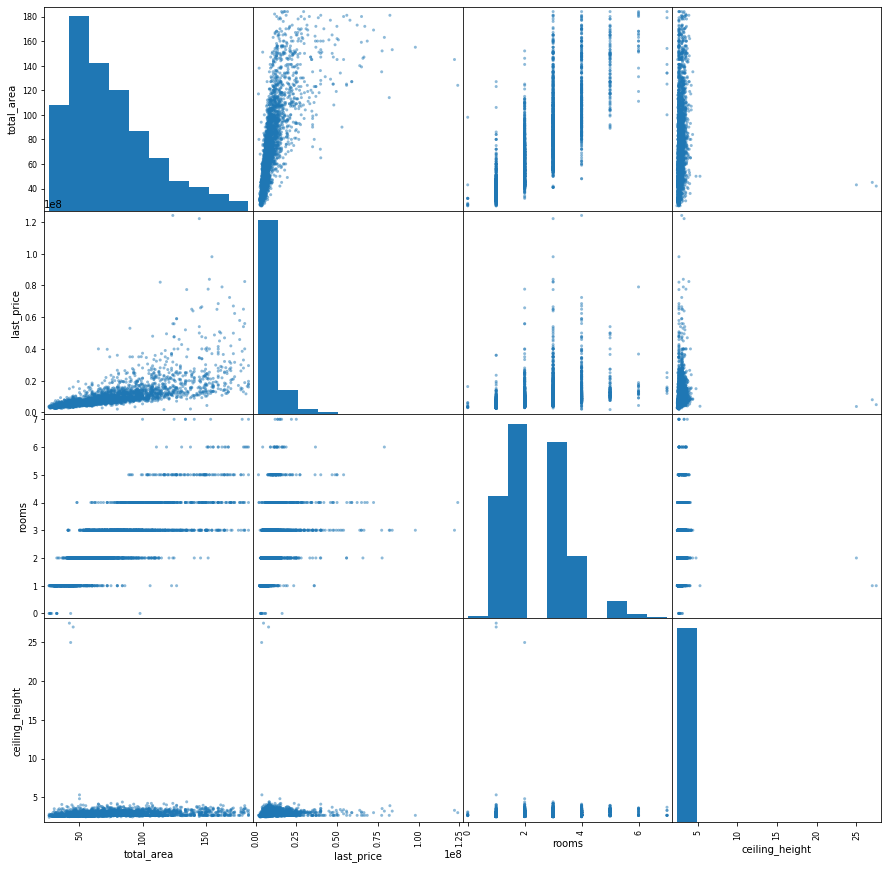

In [44]:
# Построми матрицу корреляции для следующих параметров: общая площадь квартиры, последняя стоимость квартиры,
# количество комнат
pd.plotting.scatter_matrix(filtered_data.query('to_center_km <= 10')[col_to_compare1], grid=True,
                           figsize=(15, 15))

Соотношение параметров цены от общей площади, количестве комнат, высоты потолков за пределами центра

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8e8235ad0>,
      dtype=object)

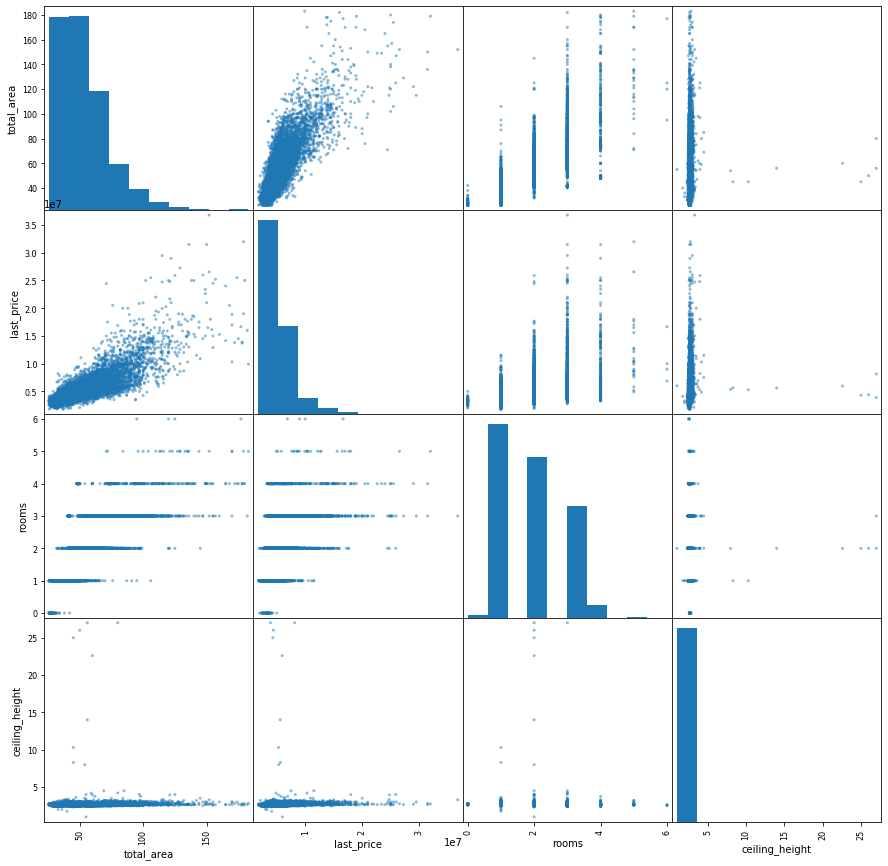

In [45]:
pd.plotting.scatter_matrix(filtered_data.query('to_center_km > 10')[col_to_compare1], grid=True,
                           figsize=(15, 15))

In [46]:
display('Таблица корреляции параметров для квартир, находящихся в центре', filtered_data.query(
    'to_center_km <= 10')[col_to_compare1].corr())
display('Таблица корреляции параметров для квартир за пределами центра', filtered_data.query(
    'to_center_km > 10')[col_to_compare1].corr())

'Таблица корреляции параметров для квартир, находящихся в центре'

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.663904,0.788874,0.096872
last_price,0.663904,1.000000,0.374153,0.063895
rooms,0.788874,0.374153,1.000000,0.071850
ceiling_height,0.096872,0.063895,0.071850,1.000000


'Таблица корреляции параметров для квартир за пределами центра'

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.816301,0.782925,0.061347
last_price,0.816301,1.000000,0.510864,0.074500
rooms,0.782925,0.510864,1.000000,0.009377
ceiling_height,0.061347,0.074500,0.009377,1.000000


**Вывод:** 
- можно отметить прямую корреляцию зависимости цены от общей площади квартиры
- отмечается преобладание высокой цены для трехкомнатных квартир
- также видно, что есть прямая корреляция между плщадью квартир и количеством комнат
- существенной корреляции между высотой потолков и цены квартиры не выявлено
- выводы также подтверждаются приведенными таблцами корреляции

## Общий вывод

В ходе работы была изучена таблица данных объявлений о продаже квартир, были изучены пропущенные значения, заменены  соответствующими средними или медианными величинами нужные параметры. Был произведен анализ корреляций, распределений, построены графики, гистограмы, таблицы рассеяния, отражающие зависимоти одной величины от другой.

В ходе данного анализа можно отметить, что существует прямая корреляция стоимости квартиры от ее общей площади.
Также отмечается прямая корреляция между расположением квартиры относительно центра и ее цены.Согласно анализу данных таблицы, центральным районом можно считать расстояние от центра г. Санкт-Петербург, равное 10 км. Отмечается более высокая цена на квартиры в радиусе 10 км от центра. Можно отметить, что стоимость квартиры также определяется выбором этажа - более дорогие квартиры находятся до 10 этажа. Возможно это связано с тем, что многоэтажных домов не так много.
При сравнении цен за квадратный метр можно отметить, что самая дорогая стоимость квадратного метра в г. Санкт-Петербург, самая низкая стоимость - в Красном Селе.
Четкой зависимости между временем продаж квартиры и ее ценой не выявлено. Однако можно отметить увеличение стоимости квартир в 2017 году. Возможно это влияние кризиса в стране.

Чаще представлены:
- квартиры, площадью квартиры 53 кв.м.
- стоимость квартир в районе 4.8 млн руб.
- двухкомнатные квартиры
- чаще представлены квартиры с высотой потолка, равной 2,65 метров
Можно отметить самую быструю продажу за один день, и самую долгую за 792 дня. Среднее же значение времени продажи 155 дней.

При сравнении стоимости квартир за пределами г. Санкт-Петербруг, можно отметить следующее:
- корреляция стоимости квадратного метра и цены на квартиру меньше, чем в СПб
- корреляция стоимости квартиры в зависисомти от количества комнат не выявлено